In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [31]:
book = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\sleep and psychological effects.csv')
df = book.copy()
df.head()

,User_ID,Age,Gender,Favorite_Book_Genre,Weekly_Reading_Time(hours),Mood_Impact
0,1,24,f,Fiction,6,Positive
1,2,32,m,Science,2,Neutral
2,3,18,f,Romance,8,Positive
3,4,45,m,History,3,Neutral
4,5,29,f,Fantasy,10,Positive


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     65 non-null     int64 
 1   Age                         65 non-null     int64 
 2   Gender                      65 non-null     object
 3   Favorite_Book_Genre         65 non-null     object
 4   Weekly_Reading_Time(hours)  65 non-null     int64 
 5   Mood_Impact                 65 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.2+ KB


In [33]:
df.shape

(65, 6)

In [34]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Favorite_Book_Genre           0
Weekly_Reading_Time(hours)    0
Mood_Impact                   0
dtype: int64

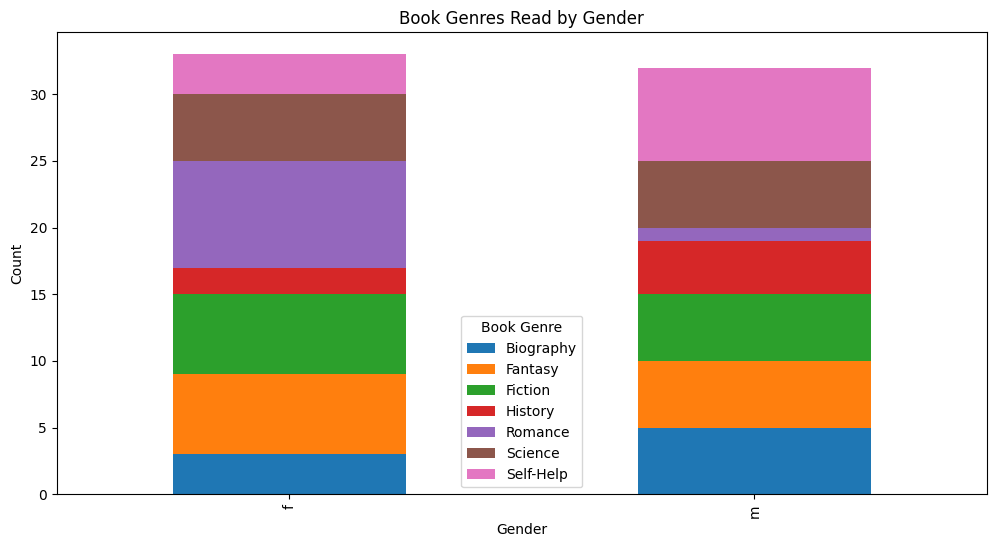

In [35]:
genre_by_gender = df.groupby(['Gender', 'Favorite_Book_Genre']).size().unstack().fillna(0)
genre_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Book Genres Read by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Book Genre')
plt.show()

Positive    37
Neutral     16
Negative    12
Name: Mood_Impact, dtype: int64


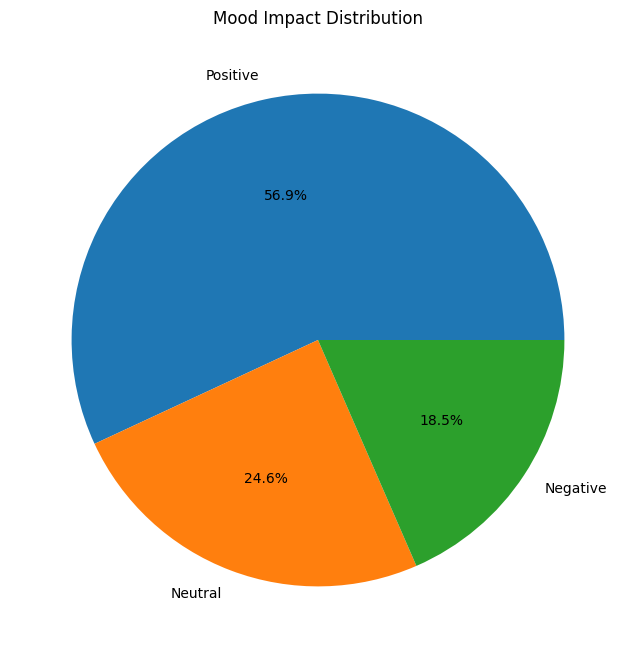

In [36]:
mood_impact_distribution = df['Mood_Impact'].value_counts()
print(mood_impact_distribution)
mood_impact_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Mood Impact Distribution')
plt.ylabel('')
plt.show()

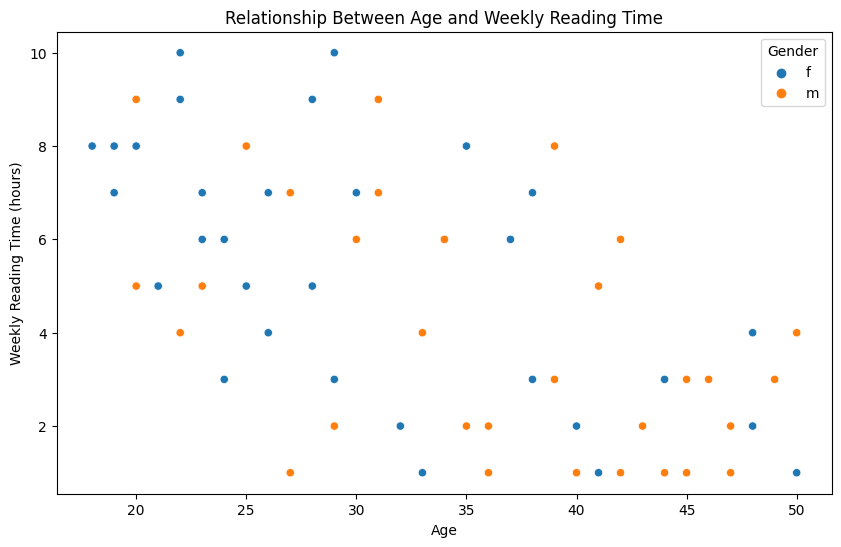

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Weekly_Reading_Time(hours)', hue='Gender')
plt.title('Relationship Between Age and Weekly Reading Time')
plt.xlabel('Age')
plt.ylabel('Weekly Reading Time (hours)')
plt.legend(title='Gender')
plt.show()

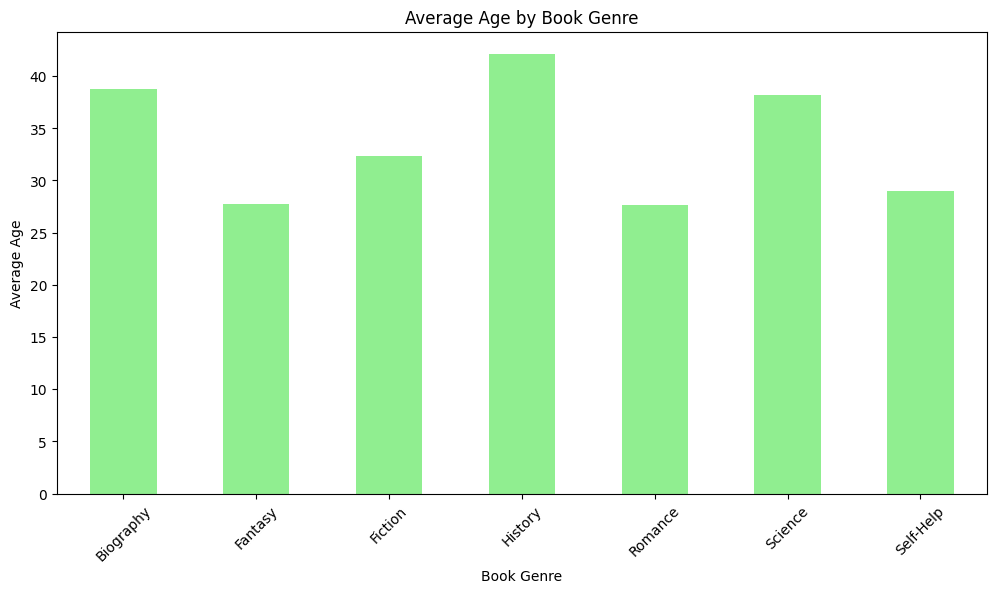

In [38]:
average_age_by_genre = df.groupby('Favorite_Book_Genre')['Age'].mean()
average_age_by_genre.plot(kind='bar', color='lightgreen', figsize=(12, 6))
plt.title('Average Age by Book Genre')
plt.xlabel('Book Genre')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

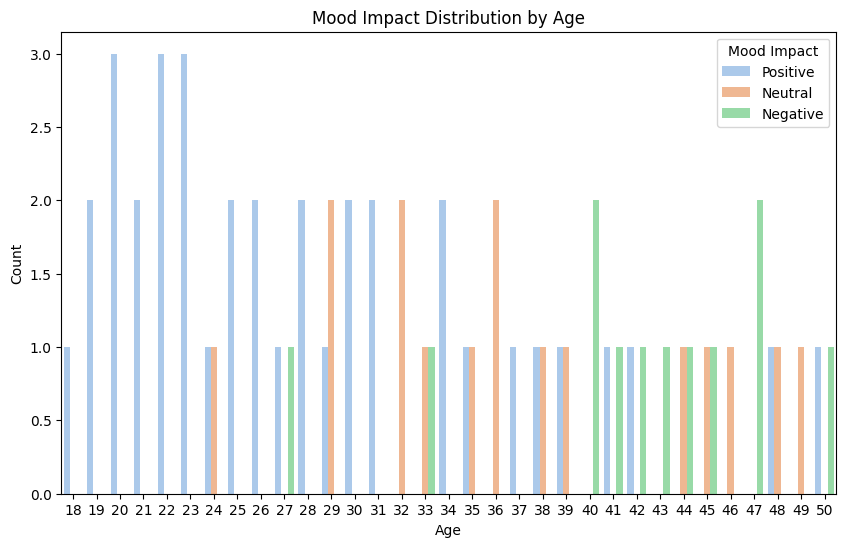

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Mood_Impact', data=df, palette='pastel')
plt.title('Mood Impact Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mood Impact')
plt.show()

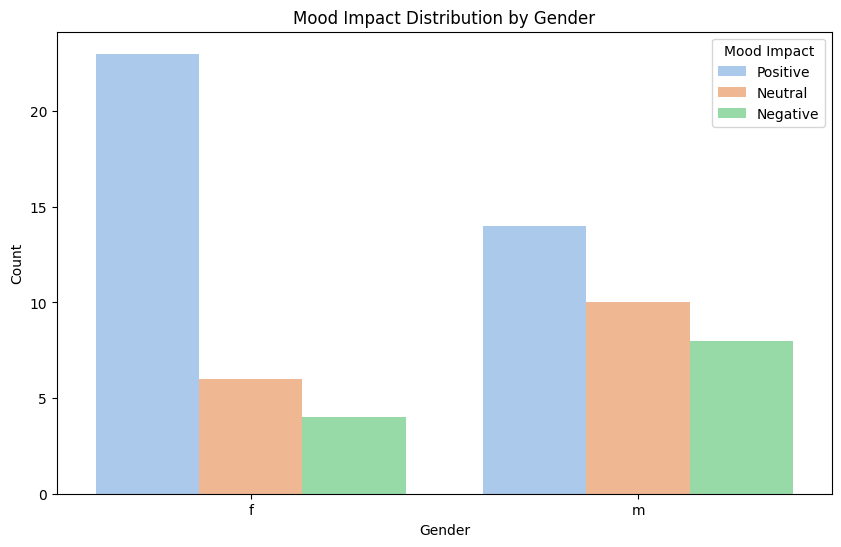

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Mood_Impact', data=df, palette='pastel')
plt.title('Mood Impact Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mood Impact')
plt.show()

In [22]:
B = df_subject_daily_dataset_merged_BTC_outer['Bitcoin_USD']

B1 = df_subject_daily_dataset_merged_BTC_outer['CryptoPotato_nft_polarity']

Dates = df_subject_daily_dataset_merged_BTC_outer['date']

# display(B)

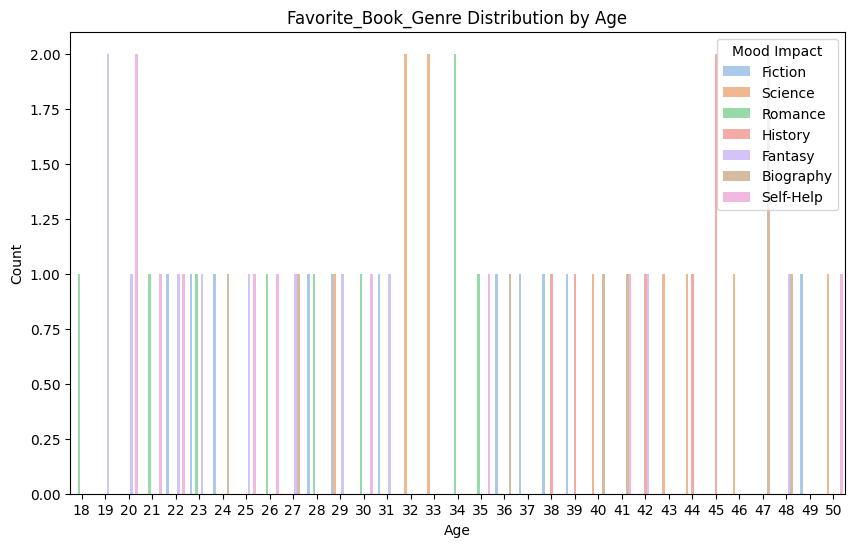

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Favorite_Book_Genre', data=df, palette='pastel')
plt.title('Favorite_Book_Genre Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mood Impact')
plt.show()

In [42]:
df = df.drop(columns='User_ID')

In [43]:
df.dtypes

Age                            int64
Gender                        object
Favorite_Book_Genre           object
Weekly_Reading_Time(hours)     int64
Mood_Impact                   object
dtype: object

In [44]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> f
1 -> m

Column: Favorite_Book_Genre
0 -> Biography
1 -> Fantasy
2 -> Fiction
3 -> History
4 -> Romance
5 -> Science
6 -> Self-Help

Column: Mood_Impact
0 -> Negative
1 -> Neutral
2 -> Positive



In [45]:
df.dtypes

Age                           int64
Gender                        int32
Favorite_Book_Genre           int32
Weekly_Reading_Time(hours)    int64
Mood_Impact                   int32
dtype: object

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('Mood_Impact',axis = 1)
y = df['Mood_Impact']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(52, 4) (13, 4)


In [48]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [49]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.7692307692307693

In [50]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [51]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6153846153846154

In [52]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [53]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.8769230769230769

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [58]:
y_pred = mlpc.predict(X_test_scaled)
ann_accuracy = accuracy_score(y_test, y_pred)
ann_accuracy

0.6153846153846154

In [59]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [60]:
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.8461538461538461

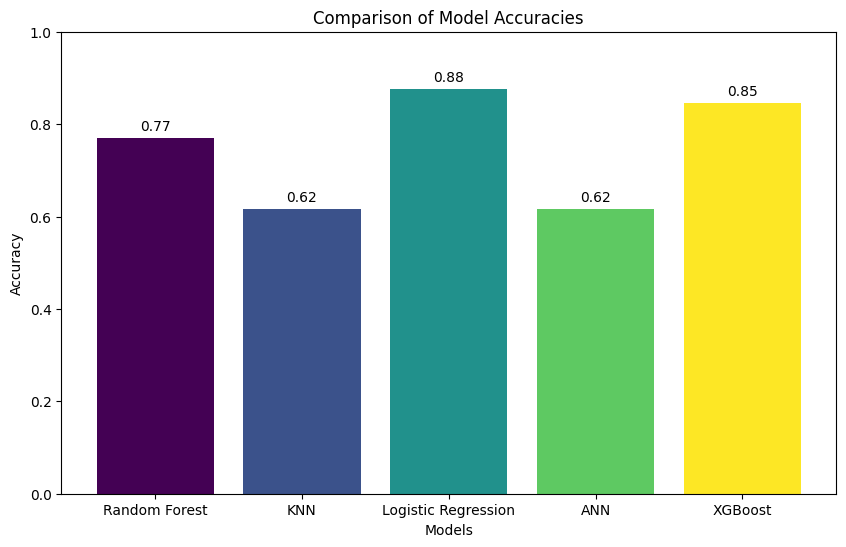

In [61]:
models = ['Random Forest', 'KNN', 'Logistic Regression', 'ANN', 'XGBoost']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy, ann_accuracy, xgb_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()